In [1]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ritik_Tomar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
from collections import Counter
import operator
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)  

In [9]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv',sep = '/t',  names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_english

english
0       new jersey is sometimes quiet during autumn , ...
1       the united states is usually chilly during jul...
2       california is usually quiet during march , and...
3       the united states is sometimes mild during jun...
4       your least liked fruit is the grape , but my l...
...                                                   ...
137855  france is never busy during march , and it is ...
137856  india is sometimes beautiful during spring , a...
137857  india is never wet during summer , but it is s...
137858  france is never chilly during january , but it...
137859  the orange is her favorite fruit , but the ban...

[137860 rows x 1 columns]

In [11]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [13]:
df = pd.concat([df_english,df_french],axis=1)
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2       california est gÃ©nÃ©ralement calme en mars , ...  
3       les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4       votre moins aimÃ© fruit est le raisin , mais m...  
...                                                   ...  
137855  la france est jamais occupÃ©e en mars , et il ...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillÃ© pendant l' Ã©tÃ© ,...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit prÃ©fÃ©rÃ© , mais la ba...  

[137860 rows x 2 columns]

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritik_Tomar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
def remove_pun(x):
    return re.sub('[!#?,.:";]',"",x)

In [17]:
df['french'].apply(remove_pun)
df['english'].apply(remove_pun)

0         new jersey is sometimes quiet during autumn  a...
1         the united states is usually chilly during jul...
2         california is usually quiet during march  and ...
3         the united states is sometimes mild during jun...
4         your least liked fruit is the grape  but my le...
                                ...                        
137855    france is never busy during march  and it is s...
137856    india is sometimes beautiful during spring  an...
137857    india is never wet during summer  but it is so...
137858    france is never chilly during january  but it ...
137859    the orange is her favorite fruit  but the bana...
Name: english, Length: 137860, dtype: object

In [18]:
english_words = []
french_words  = []

In [19]:
def get_unique_words(x,word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)
df['english'].apply(lambda x: get_unique_words(x,english_words))  
df['french'].apply(lambda x: get_unique_words(x,french_words))            

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [55]:
total_english_words = len(english_words)
total_french_words = len(french_words)

In [21]:
total_english_words

227

In [22]:
total_french_words

355

In [23]:
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 '.',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 '.',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 '.',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 ',',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 '.',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 ',',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 '.',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 ',',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 '.',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 ',',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 '.',
 'new',
 'jersey',
 'is',
 'busy',
 'during'

In [24]:
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         ',': 140897,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         '.': 129039,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 13546,
         'fruit': 27105,
         'grape': 4703,
         'but': 63987,
         'my': 9700,
         'apple': 4652,
         'his': 9700,
         'favorite': 27371,
         'orange': 4651,
         'paris': 11334

In [25]:
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [27]:
english_words_counts

227

In [28]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [32]:
fig = px.bar(x = english_words, y = english_counts)
fig.show()

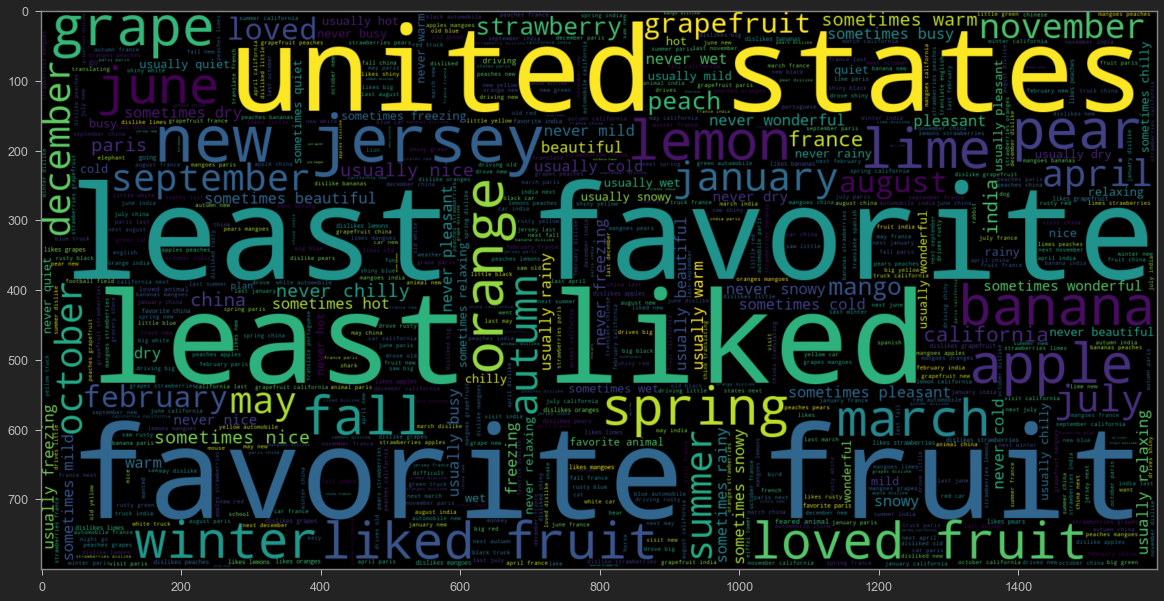

In [35]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [36]:
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  17


In [38]:
fwords=[]
for i in df['french']:
    for word in i.split():
        fwords.append(word)

In [40]:
french_words_counts = Counter(fwords)
french_words_counts

Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         ',': 123135,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         '.': 135619,
         'les': 65255,
         'Ã©tats-unis': 11210,
         'gÃ©nÃ©ralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gÃ¨le': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'lÃ©gÃ¨re': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimÃ©': 24842,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
  

In [41]:
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [42]:
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [44]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()

In [45]:
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  26


In [46]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [61]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [62]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 228


In [63]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 356


In [64]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit , but the banana is your favorite . 
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0]]


In [65]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit prÃ©fÃ©rÃ© , mais la banane est votre favori . 
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]


In [66]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [67]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril            "

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [69]:
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 17, 256)           58368     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 26, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 26, 256)           525312    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 26, 356)           91492     
Total params: 1,200,484
Trainable params: 1,200,484
Non-trainable params: 0
_________________________________________________________________


In [70]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 26, 1)

In [79]:
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=4)

Train on 111666 samples, validate on 12408 samples
Epoch 1/4
111666/111666 [==============================] - 566s 5ms/sample - loss: 0.4183 - acc: 0.8806 - val_loss: 0.4393 - val_acc: 0.8670
Epoch 2/4
111666/111666 [==============================] - 543s 5ms/sample - loss: 0.3700 - acc: 0.8944 - val_loss: 0.3676 - val_acc: 0.8915
Epoch 3/4
111666/111666 [==============================] - 541s 5ms/sample - loss: 0.3162 - acc: 0.9118 - val_loss: 0.3164 - val_acc: 0.9123
Epoch 4/4
111666/111666 [==============================] - 561s 5ms/sample - loss: 0.2743 - acc: 0.9247 - val_loss: 0.2613 - val_acc: 0.9296


In [80]:
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [81]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the united states is sometimes freezing during january but it is sometimes wet in summer  

Original French word - les ã©tats unis est parfois glaciales en janvier mais il est parfois humide en ã©tã©           

Predicted French word - les ã©tats unis est parfois glaciales en janvier mais il est parfois parfois en ã©tã©           




Original English word - india is usually beautiful during summer but it is sometimes busy in december    

Original French word - l' inde est gã©nã©ralement beau en ã©tã© mais il est parfois occupã© en dã©cembre            

Predicted French word - l' inde est gã©nã©ralement beau en avril mais il est parfois occupã© en dã©cembre            




Original English word - their least liked fruit is the lime but your least liked is the mango   

Original French word - leurs fruits moins aimã© est la chaux mais vous avez le moins aimã© est la mangue          

Predicted French word - leurs fruits est moins aimã© la chaux mais votre moins

In [83]:
model.save("weights.h5")